In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)
%config InlineBackend.figure_format = 'retina'

# 재택지수 데이터 
/
- 연도별 재택지수 비교
- 각 연도별 월별 재택지수 비교

/

데이터 출처 : https://kdx.kr/data/view/6972

## 데이터 불러오고 정제

In [3]:
hidx = pd.read_csv('./Home_Activity_Index.csv')
hidx.head()

,dt,age_cd,sex_cd,home_sido_nm,h0d0h0_dur_r,h0d0h1_dur_r,h0d1h0_dur_r,h0d1h1_dur_r,h1d0h0_dur_r,h1d0h1_dur_r,h1d1h0_dur_r,h1d1h1_dur_r
0,20181029,NaN,NaN,경상남도,0.166836,0.833054,0.467698,0.532190,0.203548,0.795637,0.407189,0.591995
1,20181029,NaN,NaN,전라북도,0.174534,0.825149,0.471113,0.528571,0.204232,0.793462,0.408986,0.588710
2,20181029,NaN,NaN,전라남도,0.173301,0.826440,0.461816,0.537923,0.210939,0.787248,0.416458,0.581742
3,20181029,NaN,NaN,충청남도,0.175661,0.823899,0.475354,0.524204,0.239265,0.758896,0.427152,0.571001
4,20181029,NaN,NaN,NaN,0.169477,0.830302,0.484912,0.514864,0.197705,0.801207,0.388608,0.610308


In [4]:
hidx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt            2772 non-null   int64  
 1   age_cd        792 non-null    float64
 2   sex_cd        198 non-null    float64
 3   home_sido_nm  1683 non-null   object 
 4   h0d0h0_dur_r  2772 non-null   float64
 5   h0d0h1_dur_r  2772 non-null   float64
 6   h0d1h0_dur_r  2772 non-null   float64
 7   h0d1h1_dur_r  2772 non-null   float64
 8   h1d0h0_dur_r  2772 non-null   float64
 9   h1d0h1_dur_r  2772 non-null   float64
 10  h1d1h0_dur_r  2772 non-null   float64
 11  h1d1h1_dur_r  2772 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 260.0+ KB


In [9]:
hidx['age_cd'].unique()

array([nan, 50., 60., 20., 10., 70.,  0., 30., 40.])

In [6]:
hidx['sex_cd'].unique()

array([nan,  2.,  1.])

In [7]:
hidx['home_sido_nm'].unique()

array(['경상남도', '전라북도', '전라남도', '충청남도', nan, '경상북도', '세종특별자치시', '경기도',
       '광주광역시', '충청북도', '제주특별자치도', '인천광역시', '부산광역시', '서울특별시', '대전광역시',
       '울산광역시', '대구광역시', '강원도'], dtype=object)

In [14]:
drop_rows = []

for i in range(1, 4):
    drop_rows.append(hidx.columns[i])
    
for i in range(4, 11):
    if i % 2 == 0:
        drop_rows.append(hidx.columns[i])

drop_rows

['age_cd',
 'sex_cd',
 'home_sido_nm',
 'h0d0h0_dur_r',
 'h0d1h0_dur_r',
 'h1d0h0_dur_r',
 'h1d1h0_dur_r']

In [15]:
hidxdrop = hidx.drop(drop_rows, axis = 1)
hidxdrop.head()

,dt,h0d0h1_dur_r,h0d1h1_dur_r,h1d0h1_dur_r,h1d1h1_dur_r
0,20181029,0.833054,0.532190,0.795637,0.591995
1,20181029,0.825149,0.528571,0.793462,0.588710
2,20181029,0.826440,0.537923,0.787248,0.581742
3,20181029,0.823899,0.524204,0.758896,0.571001
4,20181029,0.830302,0.514864,0.801207,0.610308


In [16]:
hidxdrop.columns = ['날짜', '평일야간재택지수', '평일주간재택지수', '휴일야간재택지수', '휴일주간재택지수']

hidxdrop.head()

,날짜,평일야간재택지수,평일주간재택지수,휴일야간재택지수,휴일주간재택지수
0,20181029,0.833054,0.532190,0.795637,0.591995
1,20181029,0.825149,0.528571,0.793462,0.588710
2,20181029,0.826440,0.537923,0.787248,0.581742
3,20181029,0.823899,0.524204,0.758896,0.571001
4,20181029,0.830302,0.514864,0.801207,0.610308


In [17]:
hidxdrop['날짜'] = pd.to_datetime(hidxdrop['날짜'], format = '%Y%m%d')
hidxdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        2772 non-null   datetime64[ns]
 1   평일야간재택지수  2772 non-null   float64       
 2   평일주간재택지수  2772 non-null   float64       
 3   휴일야간재택지수  2772 non-null   float64       
 4   휴일주간재택지수  2772 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 108.4 KB


In [18]:
hidxdrop.head()

,날짜,평일야간재택지수,평일주간재택지수,휴일야간재택지수,휴일주간재택지수
0,2018-10-29,0.833054,0.532190,0.795637,0.591995
1,2018-10-29,0.825149,0.528571,0.793462,0.588710
2,2018-10-29,0.826440,0.537923,0.787248,0.581742
3,2018-10-29,0.823899,0.524204,0.758896,0.571001
4,2018-10-29,0.830302,0.514864,0.801207,0.610308


In [56]:
# 2019년 이후의 데이터만 가져옴

hidx = hidxdrop[hidxdrop['날짜'].apply(lambda date: date.year) >= 2019]
hidx

,날짜,평일야간재택지수,평일주간재택지수,휴일야간재택지수,휴일주간재택지수
280,2019-01-07,0.890874,0.696649,0.894076,0.751280
281,2019-01-07,0.823063,0.547584,0.809027,0.644769
282,2019-01-07,0.818737,0.541638,0.806453,0.652892
283,2019-01-07,0.804634,0.510519,0.781171,0.623216
284,2019-01-07,0.815198,0.459219,0.818040,0.643277
...,...,...,...,...,...
2767,2020-09-14,0.833875,0.489034,0.832548,0.621958
2768,2020-09-14,0.862260,0.572801,0.845261,0.663530
2769,2020-09-14,0.850082,0.585187,0.838963,0.686007
2770,2020-09-14,0.833755,0.582789,0.811174,0.649526


In [57]:
# 2월~8월 데이터 가져오기

hidx = hidx[(hidx['날짜'].apply(lambda date: date.month) >= 2) & \
                (hidx['날짜'].apply(lambda date: date.month) <= 8)]
hidx

,날짜,평일야간재택지수,평일주간재택지수,휴일야간재택지수,휴일주간재택지수
392,2019-02-04,0.797948,0.526829,0.684447,0.554603
393,2019-02-04,0.823012,0.503711,0.780915,0.620832
394,2019-02-04,0.795010,0.474971,0.703548,0.584103
395,2019-02-04,0.837250,0.566157,0.778773,0.629793
396,2019-02-04,0.832162,0.565357,0.745649,0.616750
...,...,...,...,...,...
2711,2020-08-31,0.846063,0.507824,0.847899,0.704121
2712,2020-08-31,0.834887,0.519444,0.816935,0.699587
2713,2020-08-31,0.863711,0.596672,0.857551,0.734091
2714,2020-08-31,0.856602,0.604479,0.858489,0.741324


## 연도별 재택지수 비교

In [59]:
hidx['재택지수합'] = hidx.sum(axis = 1)
hidx.head()

,날짜,평일야간재택지수,평일주간재택지수,휴일야간재택지수,휴일주간재택지수,재택지수합
392,2019-02-04,0.797948,0.526829,0.684447,0.554603,2.563828
393,2019-02-04,0.823012,0.503711,0.780915,0.620832,2.728469
394,2019-02-04,0.795010,0.474971,0.703548,0.584103,2.557632
395,2019-02-04,0.837250,0.566157,0.778773,0.629793,2.811974
396,2019-02-04,0.832162,0.565357,0.745649,0.616750,2.759919


In [60]:
hidx = hidx.set_index('날짜')
hidx

,평일야간재택지수,평일주간재택지수,휴일야간재택지수,휴일주간재택지수,재택지수합
날짜,,,,,
2019-02-04,0.797948,0.526829,0.684447,0.554603,2.563828
2019-02-04,0.823012,0.503711,0.780915,0.620832,2.728469
2019-02-04,0.795010,0.474971,0.703548,0.584103,2.557632
2019-02-04,0.837250,0.566157,0.778773,0.629793,2.811974
2019-02-04,0.832162,0.565357,0.745649,0.616750,2.759919
...,...,...,...,...,...
2020-08-31,0.846063,0.507824,0.847899,0.704121,2.905908
2020-08-31,0.834887,0.519444,0.816935,0.699587,2.870854
2020-08-31,0.863711,0.596672,0.857551,0.734091,3.052025


In [95]:
hidx_year = hidx.groupby(lambda date: date.year).sum()['재택지수합']
hidx_year

2019    2350.699021
2020    2587.247447
Name: 재택지수합, dtype: float64

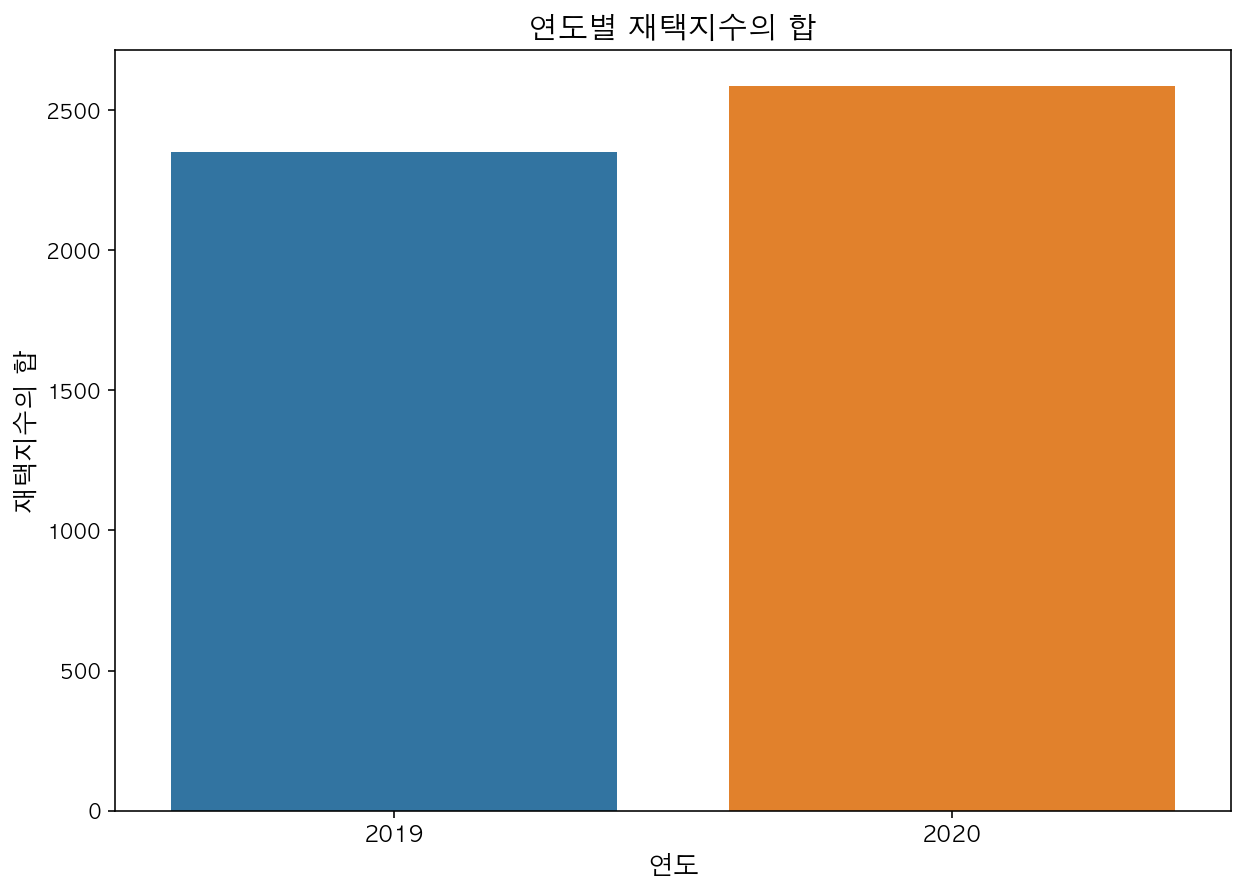

In [91]:
plt.figure(figsize = (10, 7))
sns.barplot(hidx_year.index, hidx_year.values)
plt.title('연도별 재택지수의 합', fontsize = 15)
plt.xlabel('연도', fontsize = 13)
plt.ylabel('재택지수의 합', fontsize = 13)
plt.xticks(fontsize = 11)
plt.show()

In [117]:
# 막대 그래프에 수치도 같이 나오면 좋을 것 같아서 plotly 라이브러리를 이용해봤습니다.

fig = px.bar(x = hidx_year.index, y = hidx_year.values, text = hidx_year.values, color_continuous_scale='emrld', 
       color = hidx_year.values, labels={'x':'연도', 'y': '재택지수의 합'})

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(title_text='연도별 재택지수의 합',
                  xaxis = dict(
                    tickmode = 'linear',
                    tick0 = 1,
                    dtick = 1
                ))